In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = "/content/drive/MyDrive/new_model/train"

test_path = "/content/drive/MyDrive/new_model/test"

In [ ]:
from imutils import paths
import random
SEED=10

imagePaths_train = sorted(list(paths.list_images(train_path)))
random.seed(SEED)
random.shuffle(imagePaths_train)
imagePaths_train[:5]

['/content/drive/MyDrive/new_model/train/cat.19.jpg',
 '/content/drive/MyDrive/new_model/train/cat.79.jpg',
 '/content/drive/MyDrive/new_model/train/dog.100.jpg',
 '/content/drive/MyDrive/new_model/train/cat.40.jpg',
 '/content/drive/MyDrive/new_model/train/dog.62.jpg']

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

image = cv2.imread(imagePaths_train[0])
print("Shape of image = ", image.shape)

image = cv2.resize(image,(28,28))
print("Shape of resize image = ", image.shape)

image = img_to_array(image)

image


Shape of image =  (223, 320, 3)
Shape of resize image =  (28, 28, 3)


array([[[ 25.,  27.,  28.],
        [ 25.,  27.,  28.],
        [ 31.,  33.,  34.],
        ...,
        [148., 171., 186.],
        [141., 164., 179.],
        [135., 159., 171.]],

       [[ 24.,  26.,  26.],
        [ 15.,  17.,  18.],
        [ 27.,  29.,  30.],
        ...,
        [151., 174., 189.],
        [148., 171., 186.],
        [139., 163., 175.]],

       [[ 16.,  18.,  19.],
        [ 22.,  15.,  22.],
        [ 41.,  47.,  52.],
        ...,
        [152., 178., 192.],
        [148., 174., 188.],
        [143., 166., 181.]],

       ...,

       [[149., 172., 188.],
        [155., 172., 195.],
        [ 85.,  96., 106.],
        ...,
        [ 91.,  81.,  51.],
        [ 94.,  84.,  54.],
        [ 90.,  79.,  51.]],

       [[144., 167., 183.],
        [127., 157., 172.],
        [100., 115., 132.],
        ...,
        [ 82.,  73.,  40.],
        [ 85.,  76.,  44.],
        [ 85.,  74.,  47.]],

       [[133., 156., 172.],
        [137., 160., 176.],
        [103., 1

In [ ]:
import os
imagePaths_train[0].split("/")[-1].split(".")[0]

'cat'

In [ ]:
from tqdm import tqdm_notebook as tqdm

# initialize the data and labels
print("[INFO] loading images...")
train_X = []
train_Y = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(train_path)))
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar
with tqdm(total=len(imagePaths)) as pbar:
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        train_X.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-1].split(".")[0]

        if label == "cat":
            label = 0
        elif label == "dog":
            label = 1

        # print("pr: ", label)

        train_Y.append(label)

        # update the progressbar
        pbar.update(1)


[INFO] loading images...


<ipython-input-6-75ac8f014d3a>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm(total=len(imagePaths)) as pbar:


  0%|          | 0/202 [00:00<?, ?it/s]

In [ ]:
import numpy as np
train_X = np.array(train_X, dtype="float") / 255.0
train_Y = np.array(train_Y)

from sklearn.model_selection import train_test_split
(trainX, valX, trainY, valY) = train_test_split(train_X, train_Y, test_size=0.40, random_state=SEED)

In [ ]:
trainX.shape

(121, 28, 28, 3)

In [ ]:
valX.shape

(81, 28, 28, 3)

In [ ]:
valY

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY, num_classes=2)
valY = to_categorical(valY, num_classes=2)

In [ ]:
valY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [ ]:
trainY

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode="nearest")

In [ ]:
EPOCHS = 10
INIT_LR = 1e-3
BS = 2

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
# create CNN Model

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()                ## siamese networks
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        print(K.image_data_format())
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [ ]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print("[INFO] model complied...")

[INFO] compiling model...
channels_last
[INFO] model complied...


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        1520      
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                    

In [ ]:
BS = 2

print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(valX, valY),
              steps_per_epoch=len(trainX) // BS,
              epochs=EPOCHS,
              verbose=1)

[INFO] training network...
Epoch 1/10
60/60 [==============================] - 4s 41ms/step - loss: 0.7347 - accuracy: 0.4370 - val_loss: 0.6948 - val_accuracy: 0.4691
Epoch 2/10
60/60 [==============================] - 1s 22ms/step - loss: 0.6931 - accuracy: 0.5210 - val_loss: 0.6945 - val_accuracy: 0.4568
Epoch 3/10
60/60 [==============================] - 1s 23ms/step - loss: 0.6929 - accuracy: 0.5126 - val_loss: 0.7010 - val_accuracy: 0.4691
Epoch 4/10
60/60 [==============================] - 1s 23ms/step - loss: 0.6978 - accuracy: 0.4874 - val_loss: 0.6945 - val_accuracy: 0.5309
Epoch 5/10
60/60 [==============================] - 1s 23ms/step - loss: 0.7014 - accuracy: 0.5546 - val_loss: 0.6953 - val_accuracy: 0.4691
Epoch 6/10
60/60 [==============================] - 2s 34ms/step - loss: 0.6933 - accuracy: 0.5210 - val_loss: 0.6958 - val_accuracy: 0.4691
Epoch 7/10
60/60 [==============================] - 2s 32ms/step - loss: 0.6915 - accuracy: 0.5210 - val_loss: 0.6973 - val_acc

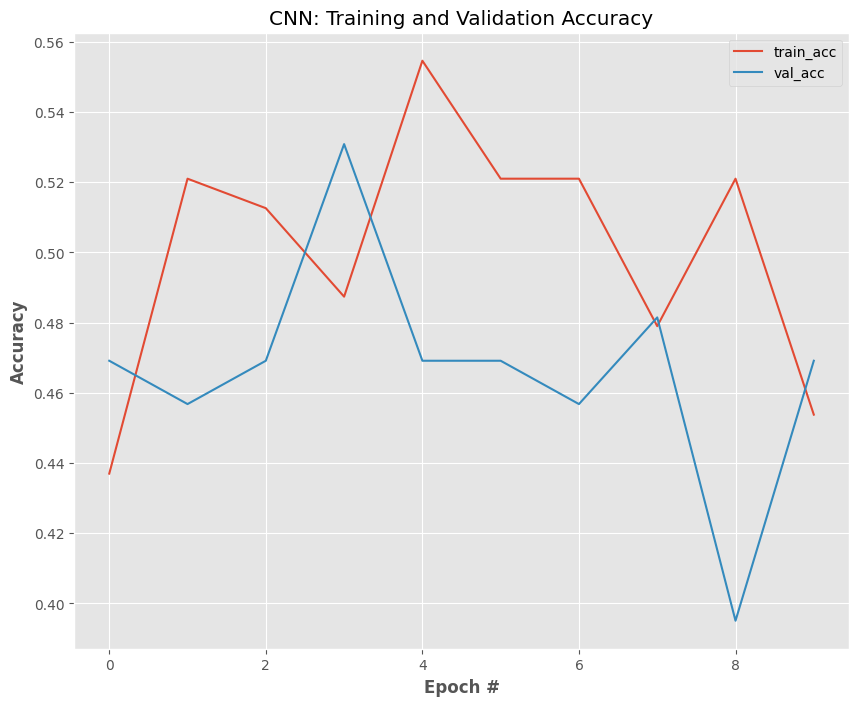

In [ ]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/new_model/cat_dog_new.model")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/new_model/cat_dog_new.model")

In [ ]:
import imutils
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid()
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
from tqdm import tqdm_notebook as tqdm

# initialize the data and labels
print("[INFO] loading images...")

predicted_label = []
image_numbers = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(test_path)))
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar
with tqdm(total=len(imagePaths)) as pbar:
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        orig = image.copy()
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        image_number = imagePath.split("/")[-1].split(".")[0]
        image_numbers.append(image_number)

        # classify the input image
        prd_conf = model.predict(image)[0]

        all_class = ["Cat","Dog"]
        # build the label
        label = all_class[np.argmax(prd_conf)]
        predicted_label.append(label)
        proba = prd_conf[np.argmax(prd_conf)]

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=200)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)

        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

        pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.